In [1]:
from graphviz import Digraph

In [196]:
class Var:
    def __init__(self, name, val):
        self.name = name
        self.val = val

    def __repr__(self):
        return f"{self.name}={self.val}"

class GotoStmt:
    def __init__(self, goto):
        self.goto = goto
    
    def __repr__(self):
        return f"goto {self.goto}"

class ReturnStmt:
    def __init__(self, retval):
        self.retval = retval

    def __repr__(self):
        return f"return {self.retval}"

class BinOp:
    def __init__(self, lhs, rhs, op):
        self.lhs = lhs
        self.rhs = rhs
        self.op = op

    def __repr__(self):
        return f"{self.lhs} {self.op} {self.rhs}"

class IfStmt:
    def __init__(self, condition, thengoto, elsegoto):
        self.condition = condition
        self.thengoto = thengoto
        self.elsegoto = elsegoto

    def __repr__(self):
        return f"if({self.condition}) {self.thengoto}\n else {self.elsegoto}"


In [258]:
class BasicBlock:
    def __init__(self, name, instr):
        self.name = name
        self.instr = instr
        self.pred = []
        self.succ = []
            
    def __repr__(self):
        instr_str = "\n  ".join(str(i) for i in self.instr)
        return f"{self.name}:\n  {instr_str}"

    def add_pred(self, *blocks):
        for block in blocks:
            self.pred.append(block)

    def add_succ(self, *blocks):
        for block in blocks:
            self.succ.append(block)
    
    def get_label(self):
        instr_str = "\n".join(str(i) for i in self.instr)
        return f"{self.name}:\n{instr_str}"
    

In [278]:
class CFG:
    def __init__(self, blocks):
        self.blocks = blocks
        self.g = Digraph("CFG")
        self.g.attr(rankdir="TB")           
        self.g.attr('node', shape='box', style='filled', fillcolor='lightgrey')

    def render(self, view=False, filename="cfg"):
        for block in self.blocks:
            self.g.node(block.name, label=block.get_label())
            for succ_block in block.succ:
                self.g.edge(block.name, succ_block.name)
        return self.g

    def print(self):
        for block in self.blocks:
            succ_names = [s.name for s in block.succ]
            pred_names = [p.name for p in block.pred]
            print(f"{block.name} succ: {succ_names} pred: {pred_names}")

In [281]:
bb0 = BasicBlock("BB0", [
    Var("x", 1),
    Var("y", 0),
    IfStmt(BinOp(x.name, 42, "<"), GotoStmt("BB2"), GotoStmt("BB1"))
])

bb1 = BasicBlock("BB1", [
    Var("y", 1),
    GotoStmt("BB3")
])

bb2 = BasicBlock("BB2", [
    Var("y", BinOp(x.name, 2, "+")),
    GotoStmt("BB3")
])

bb3 = BasicBlock("BB3", [
    ReturnStmt("y")
])

bb0.add_succ(bb2, bb1)
bb2.add_succ(bb3)
bb1.add_succ(bb3)

bb1.add_pred(bb0)
bb2.add_pred(bb0)
bb3.add_pred(bb2, bb1)

BB0 succ: ['BB2', 'BB1'] pred: []
BB1 succ: ['BB3'] pred: ['BB0']
BB2 succ: ['BB3'] pred: ['BB0']
BB3 succ: [] pred: ['BB2', 'BB1']


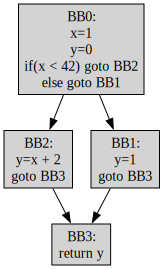

In [282]:
cfg = CFG([bb0, bb1, bb2, bb3])
cfg.print()
cfg.render()